# NAT Meter stats

In [13]:
import requests
from datetime import datetime
%matplotlib inline

In [14]:
CHARTS_ASPECT = (15, 3)
XAXIS_FORMAT = '%m-%Y'

In [15]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def plot(x, y, title="", xlabel = "Date (mm-yyyy)", ylabel=""):
    
    plt.figure(figsize=CHARTS_ASPECT)
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(XAXIS_FORMAT))
    xticks = list(set([_.replace(day=1, hour=0, minute=0, second=0, microsecond=0) for _ in x]))  # truncated dates --> (y,m,d)
    
    plt.plot_date(
        x, y,
        color=plt.get_cmap('Reds')(200), # TODO linestyle='solid'
    )
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.grid(linestyle='dotted')
    plt.xticks(xticks, rotation=30)
    
    plt.show()
    
BASE_URL = "https://natmeter.labs.lacnic.net/reports"

def fetch(url):
    _dict = {}
    
    response = requests.get(BASE_URL + url)
    entries = response.text.split("\n")
    for e in entries:
        if "," in e:
            k,v = e.split(",")
            _dict[datetime.strptime(k, '%Y-%m-%d')] = int(v)
    return _dict

## Dualstack

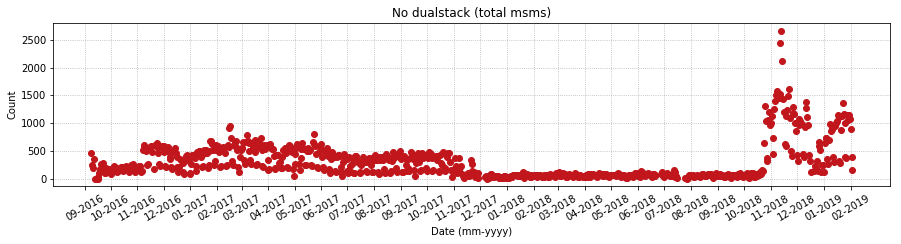

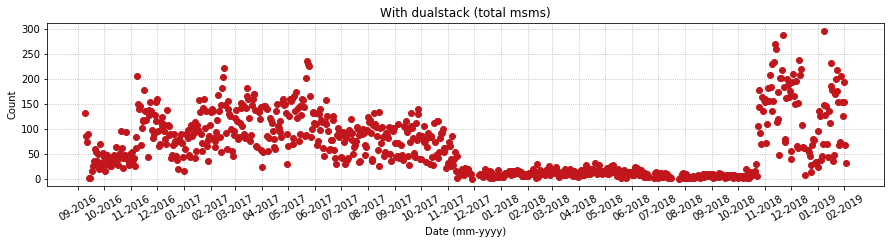

In [16]:
urls = ["/dualstack_false", "/dualstack_true"]
titles = ["No dualstack (total msms)", "With dualstack (total msms)"]

answers = {}
for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

## Dualstack ratio (true / total)

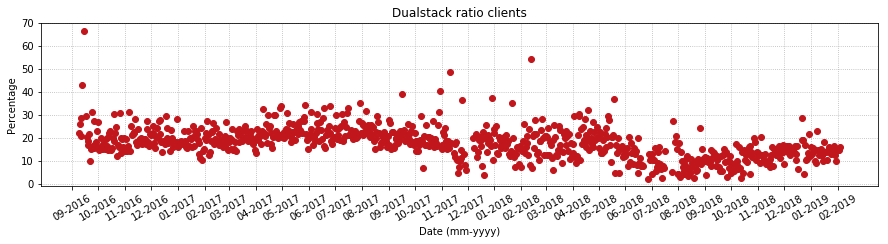

In [17]:
chart = {}

for k,v in answers["/dualstack_true"].items():
    ratio = 100.0*v / (answers["/dualstack_false"][k] + v)
    chart[k] = ratio

plot(
    chart.keys(), chart.values(), title="Dualstack ratio clients", ylabel="Percentage"
)

## NAT (any)

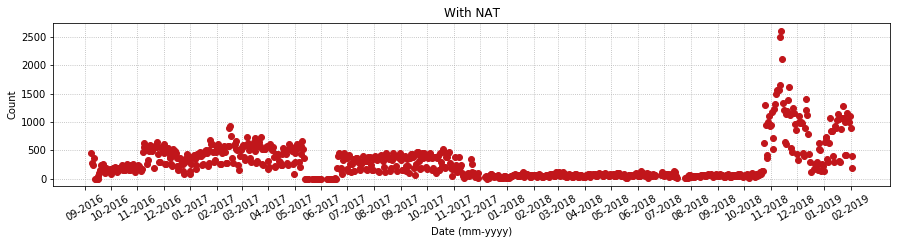

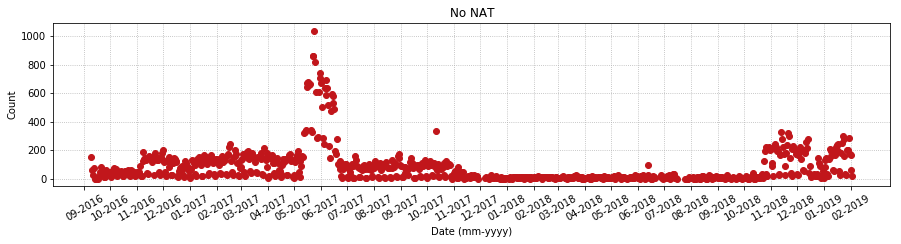

In [18]:
# plotting
urls = ["/nat_free_0_false", "/nat_free_0_true"]
titles = ["With NAT", "No NAT"]

answers = {}
for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

## NAT (any) ratio

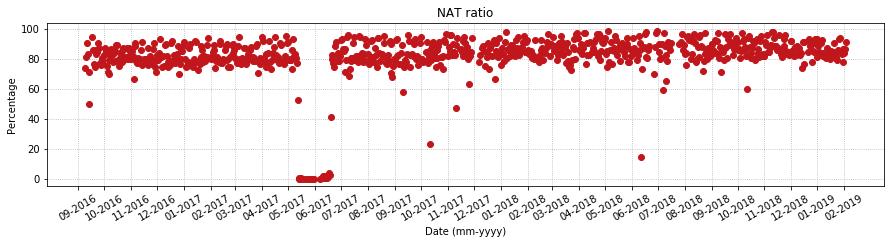

In [19]:
chart = {}

for k,v in answers["/nat_free_0_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_0_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="NAT ratio", ylabel="Percentage"
)

## NAT 66

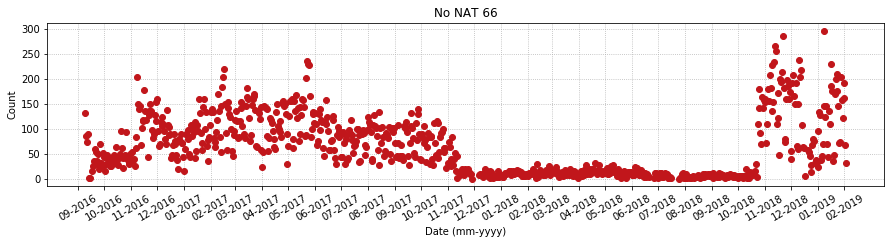

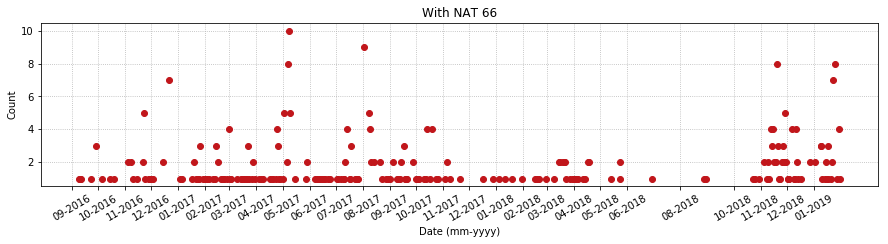

In [20]:
# plotting
urls = ["/nat_free_6_true", "/nat_free_6_false"]
titles = ["No NAT 66", "With NAT 66"]

answers = {}
for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

## NAT 66 ratio

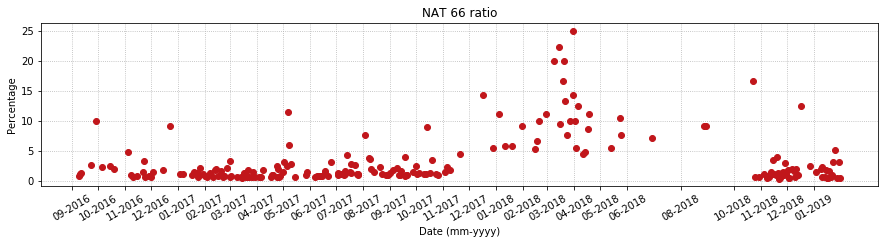

In [21]:
chart = {}

for k,v in answers["/nat_free_6_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_6_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="NAT 66 ratio", ylabel="Percentage"
)

## NAT 44

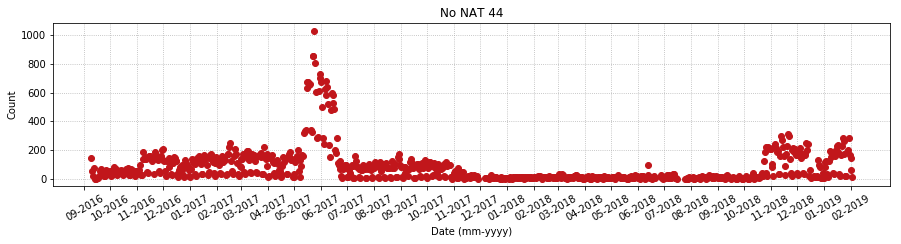

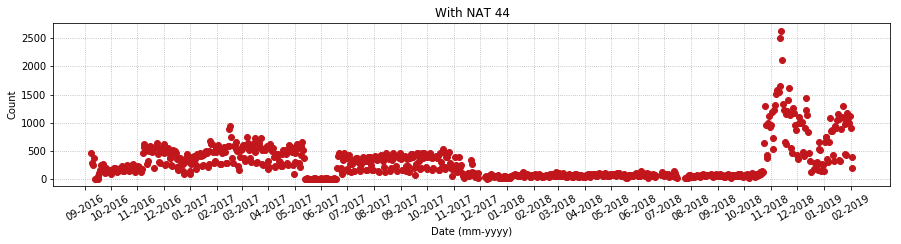

In [22]:
# plotting
urls = ["/nat_free_4_true", "/nat_free_4_false"]
titles = ["No NAT 44", "With NAT 44"]

answers = {}
for i, url in enumerate(urls):
    _dict = fetch(url)
    answers[url] = _dict
    
    plot(
        _dict.keys(), _dict.values(), title=titles[i], ylabel="Count"
    )

## NAT 44 ratio

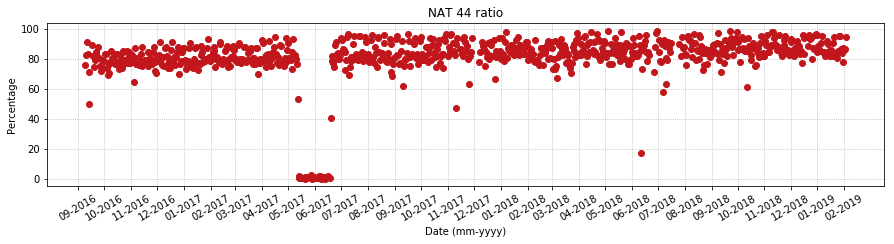

In [23]:
chart = {}

for k,v in answers["/nat_free_4_false"].items():
    try:
        ratio = 100.0*v / (answers["/nat_free_4_true"][k] + v)
    except KeyError:
        continue
        
    chart[k] = ratio
    
plot(
    chart.keys(), chart.values(), title="NAT 44 ratio", ylabel="Percentage"
)